## Reading a data file with multiple data blocks



In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [2]:
d = pd.read_csv("SIO_2.TXT", delim_whitespace=True,  skiprows=4)
d

,V,A
1,-40.00,-1.424200e-05
2,-39.85,-1.409100e-05
3,-39.70,-1.389200e-05
4,-39.55,-1.377300e-05
5,-39.40,-1.372700e-05
...,...,...
1666,9.35,4.619400e-08
1667,9.50,-6.069200e-08
1668,9.65,-7.775500e-08
1669,9.80,-5.004100e-08


In [100]:
with open("SIO_2.TXT") as f:
    head = [next(f) for x in range(4)]
print(head)

['FET Vds-Id\n', 'VG= -40 to 9.95 in 0.15 step\n', 'VDS= -20 to 0 in 5 step\n', 'NO. VG ID\n']


In [101]:
V_G = np.arange(-40,9.95+0.15,step=0.15) # note arange does not include the endpoint, so we go one step further
V_G.shape
V_DS = np.arange(-20,0+5,step=5) # note arange does not include the endpoint, so we go one step further
V_DS.shape

(5,)

Let's check that the information is consistent with the data

In [102]:
d.shape[0] / V_G.shape[0] == V_DS.shape[0] 


True

In [119]:
# d["V_DS"] = np.tile(V_DS, V_G.shape[0])
d["V_DS"] = np.repeat(V_DS, V_G.shape[0])
d

,V,A,V_DS,ratio
1,-40.00,-1.424200e-05,-20,2.808594e+06
2,-39.85,-1.409100e-05,-20,2.828046e+06
3,-39.70,-1.389200e-05,-20,2.857760e+06
4,-39.55,-1.377300e-05,-20,2.871560e+06
5,-39.40,-1.372700e-05,-20,2.870256e+06
...,...,...,...,...
1666,9.35,4.619400e-08,0,2.024072e+08
1667,9.50,-6.069200e-08,0,-1.565280e+08
1668,9.65,-7.775500e-08,0,-1.241078e+08
1669,9.80,-5.004100e-08,0,-1.958394e+08


We may sometimes want to convert from long to wide format, so that all the measurements are in separate columns:

In [104]:
d.pivot(index='V', columns='V_DS', values='A')

V_DS,-20,-15,-10,-5,0
V,,,,,
-40.00,-1.424200e-05,-1.177200e-05,-7.496500e-06,-2.533700e-06,2.892200e-06
-39.85,-1.409100e-05,-1.176200e-05,-7.583800e-06,-2.718800e-06,2.782900e-06
-39.70,-1.389200e-05,-1.176300e-05,-7.524300e-06,-2.730000e-06,2.615600e-06
-39.55,-1.377300e-05,-1.163400e-05,-7.443200e-06,-2.722000e-06,2.414700e-06
-39.40,-1.372700e-05,-1.147100e-05,-7.477000e-06,-2.816800e-06,2.359900e-06
...,...,...,...,...,...
9.35,-9.515400e-08,-2.034900e-08,-1.250400e-07,-9.001600e-08,4.619400e-08
9.50,-6.714200e-08,-1.200300e-07,-6.741000e-08,-1.037900e-08,-6.069200e-08
9.65,-7.140100e-08,-7.929000e-08,-5.859100e-08,1.502000e-08,-7.775500e-08


We can now, for example, plot the I/V data by groups:

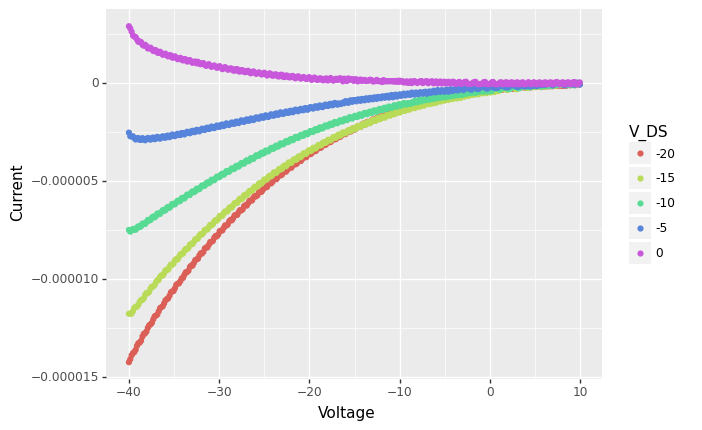

<ggplot: (8769427903199)>

In [111]:
#conda install -c conda-forge plotnine 
from plotnine import *
# note the use of parentheses, because the syntax below (+) is non-standard in Python
(ggplot(d) +
  geom_point(aes(x = 'V',
                  y = 'A',
                  color = 'factor(V_DS)')) +
  labs(colour = 'V_DS', x = "Voltage", y = "Current"))

Another type of thing we might do with this 'long' format is to transform or summarise the data by V_DS value, with the [split-apply-combine strategy](https://pandas.pydata.org/docs/user_guide/groupby.html):

In [106]:
def IV_ratio(x):
    return  x['V'] / x['A']

d["ratio"] = d.groupby("V_DS").apply(IV_ratio).values
d

,V,A,V_DS,ratio
1,-40.00,-1.424200e-05,-20,2.808594e+06
2,-39.85,-1.409100e-05,-20,2.828046e+06
3,-39.70,-1.389200e-05,-20,2.857760e+06
4,-39.55,-1.377300e-05,-20,2.871560e+06
5,-39.40,-1.372700e-05,-20,2.870256e+06
...,...,...,...,...
1666,9.35,4.619400e-08,0,2.024072e+08
1667,9.50,-6.069200e-08,0,-1.565280e+08
1668,9.65,-7.775500e-08,0,-1.241078e+08
1669,9.80,-5.004100e-08,0,-1.958394e+08


In [117]:
# d.groupby("V_DS").apply(lambda x: x.max() - x.min())

/Users/baptiste/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
/Users/baptiste/opt/anaconda3/lib/python3.9/site-packages/plotnine/layer.py:412: PlotnineWarning: geom_point : Removed 542 rows containing missing values.


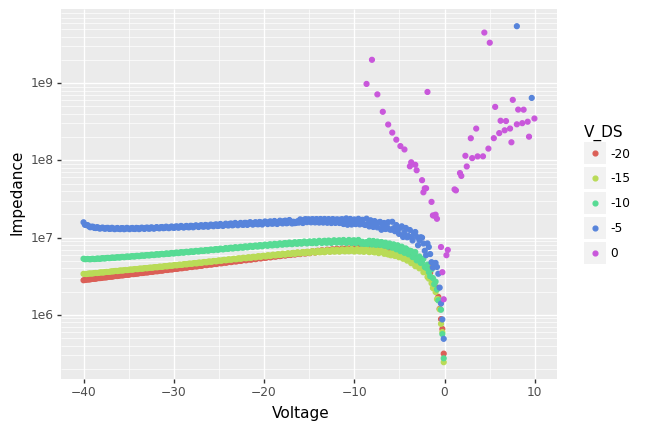

<ggplot: (8769470026379)>

In [109]:
(ggplot(d) +
  geom_point(aes(x = 'V',
                  y = 'ratio',
                  color = 'factor(V_DS)')) +
  scale_y_log10() +
  labs(colour = 'V_DS', x = "Voltage", y = "Impedance"))

_Download this page [as a Jupyter notebook](https://github.com/vuw-scps/python-physics/raw/master/notebooks/phys345/wrangling_01_singlefile_blocks.ipynb) or as a [standalone Python script](https://github.com/vuw-scps/python-physics/raw/master/scripts/phys345/wrangling_01_singlefile_blocks.py)._